Delgado, Nic Leander A.\
Lecture 3

---

<b>Graph</b>

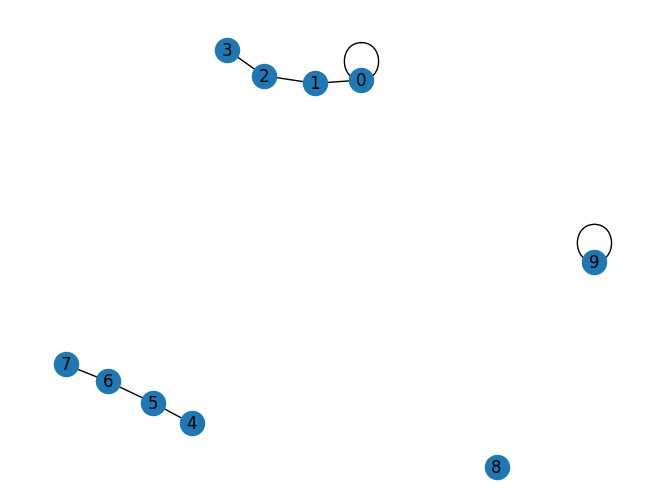

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# Parameters for the new graph
n = 10  # 10 nodes
m = 8  # 8 edges
seed = 100  # seed random number generators for reproducibility

# Use seed for reproducibility
G = nx.gnm_random_graph(n, m, seed=seed)

# Manually add edges to ensure disconnected components
# Remove all edges first to start fresh
G.remove_edges_from(list(G.edges))

# Add edges to create two disconnected components
edges_component_1 = [(0, 1), (1, 2), (2, 3)]
edges_component_2 = [(4, 5), (5, 6), (6, 7)]

# Add these edges to the graph
G.add_edges_from(edges_component_1 + edges_component_2)

# Add self-loops to two nodes
G.add_edges_from([(0, 0), (9, 9)])

# Position nodes using a spring layout
pos = nx.spring_layout(G, seed=seed)

# Draw the graph
nx.draw(G, pos=pos, with_labels=True)
plt.show()


The graph has 10 vertices:

$$V(G) = \{v_0, v_1, v_2, v_3, v_4, v_5, v_6, v_7, v_8, v_9\}$$

And it has 8 edges:

$$E(G) = \{e_0, e_1, e_2, e_3, e_4, e_5, e_6, e_7\}$$
\
The edge-endpoint function is as follows:

\begin{gather}
\begin{bmatrix}
\begin{array}{c|c}
Edge & Endpoints \\
e_0 & \{v_0\} \\
e_1 & \{v_0, v_1\} \\
e_2 & \{v_1,v_2\} \\
e_3 & \{v_2,v_3\} \\
e_4 & \{v_4,v_5\} \\
e_5 & \{v_5,v_6\} \\
e_6 & \{v_6,v_7\} \\
e_7 & \{v_9\}\\
\end{array}
\end{bmatrix}
\end{gather}


    
- The self loop edges are: $e_0$ and $e_7$, where $v_0$ and $v_9$ are connected to itself
- Two vertices are adjacent if an edge connects them and a vertex is adjacent to itself if it is an endpoint of a loop.
     - For instance, $v_1$ is adjacent to $v_0$ and $v_2$
     - $v_0$ and $v_9$ are adjacent to themselves
-  An edge is incident on its endpoints
      - For instance, $e_0$ and $e_1$ are incident to $v_0$
- Two edges are adjacent if they are incident on the same vertex
    -  As  $e_0$ and $e_1$ are incident to $v_0$, that means they are also adjacent to each other
- Parallel edges are distinct edges with the same set of endpoints
    - In this graph's case, there are no parallel edges
- A vertex is said to be isolated if it has no incident edges
    - $v_8$ is an isolated vertex

---

<b>Directed Graph (Digraph)</b>

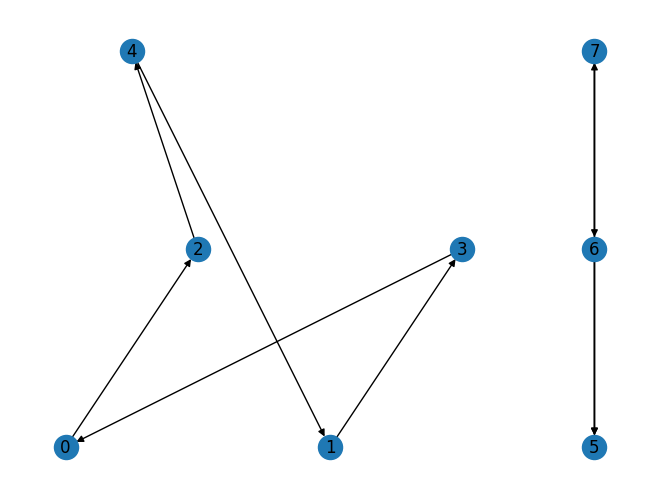

In [55]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

# Add nodes
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7])

# Add edges
edgelist = [(0, 2), (2, 4), (4, 1), (1, 3), (3, 0), (5, 7), (7, 5), (6, 5), (7, 6)]
G.add_edges_from(edgelist)

# Specify positions for nodes
pos = {
    0: (0, 0),
    1: (1, 0),
    2: (0.5, 1),
    3: (1.5, 1),
    4: (0.25, 2),
    5: (2, 0),
    6: (2, 1),
    7: (2, 2)
}

# Draw the graph
nx.draw(G, pos=pos, with_labels=True)

# Display the plot
plt.show()


$V(G) = \{v_0, v_1, v_2, v_3, v_4, v_5, v_6, v_7, v_8, v_9\}$\
$D(G) = \{(v_0, v_2), (v_2, v_4), (v_4, v_1), (v_1, v_3), (v_3,v_0), (v_5,v_7), (v_7,v_5), (v_6,v_5), (v_7,v_6)\}$
  
D(G) is a set of directed edges, where each is associated with an ordered pair of vertices called its endpoints. Each edge is linked to a specific pair of vertices in a particular order. For instance, the edge $(v_0, v_2)$ indicates a direct connection from $v_0$ and $v_2$


---

<b>Simple Graph

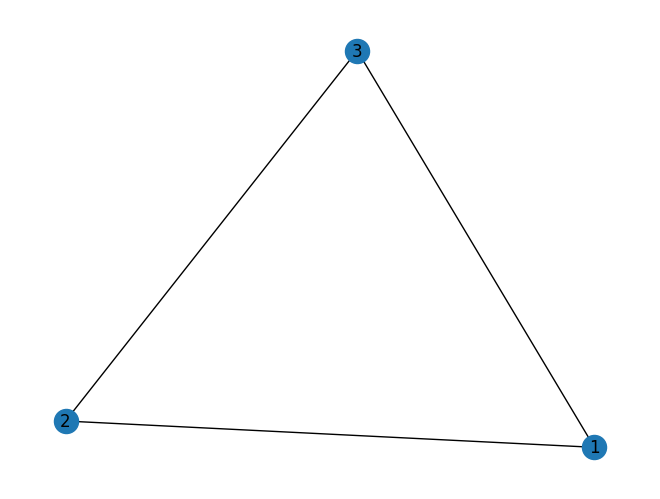

In [57]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3])

# Add edges
edgelist = [(1, 2), (2, 3), (3, 1)]
G.add_edges_from(edgelist)

# Draw the graph
nx.draw(G, with_labels=True)

# Display the plot
plt.show()


A simple graph is a graph that doesn't have loops or parallel edges. In the case of the graph, there are no loops and parallel edges. It will not become a simple graph if, for instance, $v_2$ is connected to itself, or if there is another distinct edge connecting $v_1$ and $v_3$, despite having an edge already existing between them.

---

<b>Complete Graph

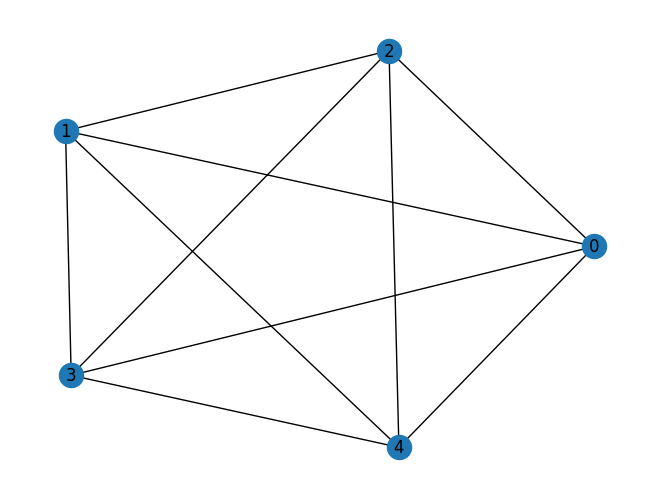

In [58]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a complete graph K5
G = nx.complete_graph(5)

# Draw the graph
nx.draw(G, with_labels=True)

# Display the plot
plt.show()


- Let $n$ be the number of vertices in the graph. $K_n$ is a simple graph with $n$ vertices and there is exactly one edge connecting each pair of distinct vertices.
- $n$ = 5. $K_5$ has 5 vertices
- Since $K_5$ is a complete graph, there is precisely one edge connecting every pair of distinct vertices
    - $v_1$ is adjacent to the other nodes, $v_2$,$v_3$,$v_4$, and $v_5$,
    - $v_2$ is also adjacent to the other nodes, $v_1$,$v_3$,$v_4$, and $v_5$, and so on for all vertices
    - The total number of edges would be $\frac{n(n-1)}2 = \frac{5(5-1)}2 = \frac{20}2 = 10$

---

<b>Bipartite Graphs

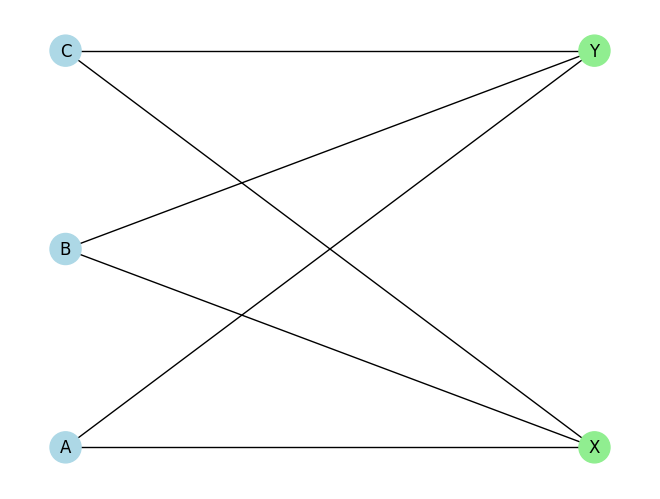

In [36]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the bipartite graph
G = nx.Graph()

# Define sets of vertices
set1 = ['A', 'B', 'C']
set2 = ['X', 'Y']

# Add nodes from both sets
G.add_nodes_from(set1, bipartite=0)
G.add_nodes_from(set2, bipartite=1)

# Define edges between the two sets
edges = [('A', 'X'), ('A', 'Y'), ('B', 'X'), ('C', 'Y'),('B', 'Y'), ('C', 'X') ]
G.add_edges_from(edges)

# Separate nodes by bipartite attribute for coloring
color_map = []
for node in G:
    if G.nodes[node]['bipartite'] == 0:
        color_map.append('lightblue')  # Color for set 1
    else:
        color_map.append('lightgreen')  # Color for set 2

# Draw the graph
pos = nx.bipartite_layout(G, set1)
nx.draw(G, pos=pos, with_labels=True, node_color=color_map, node_size=500)

# Display the plot
plt.show()


This is a complete bipartite graph for the following reasons:
- There exists an edge between any pair of vertices $v_i$ and $w_i$ of different partitions.
- There are no edges between vertices within the same partition

---

<b>Subgraph

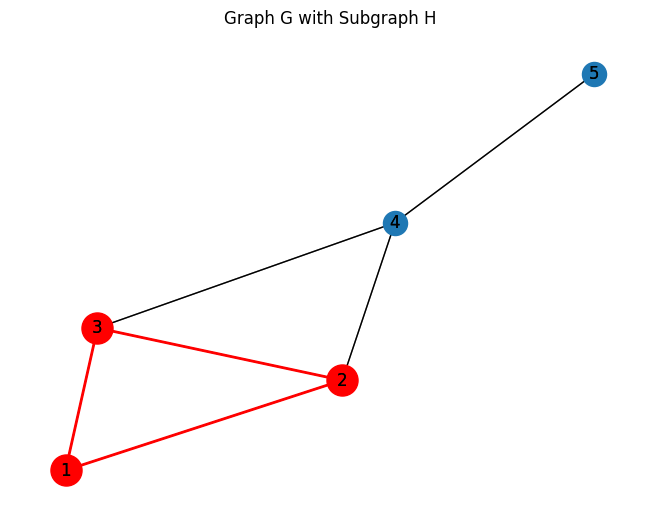

In [65]:
import matplotlib.pyplot as plt
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5])

# Add edges
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)])

# Create a subgraph
H_nodes = [1, 2, 3]  # Nodes of the subgraph
H_edges = [(1, 2), (1, 3), (2,3)]  # Edges of the subgraph

# Create a subgraph from G
H = G.subgraph(H_nodes)

# Draw the original graph G
pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Highlight the subgraph H
nx.draw_networkx_nodes(G, pos, nodelist=H_nodes, node_color='red', node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=H_edges, width=2.0, edge_color='red')

# Add labels
labels = {1: '1', 2: '2', 3: '3', 4: '4', 5: '5'}
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color='black')

# Set plot options
plt.title('Graph G with Subgraph H')
plt.axis('off')

# Show the plot
plt.show()


- Graph G consists of vertices (labeled 1 to 5), interconnected by edges
- Subgraph H is a subset of Graph G, containing vertices 1, 2, and 3, along with the edges connecting these nodes
- Every vertex in H is also in G. $v_1$, $v_2$, $v_3$ are also present in the original graph G
- Every edge in H is also in G, and every edge in H has the same endpoints as it has in G. $(v_1,v_3)$, $(v_1,v_2)$, $(v_2,v_3)$ are also present in the original graph G

---

<b>Degree of a Vertex

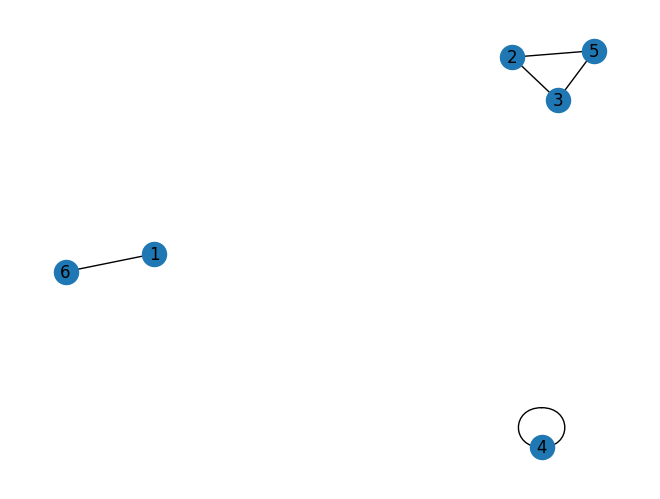

In [54]:
import matplotlib.pyplot as plt
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5])

# Add self-loops to some nodes
edgelist = [(2, 3), (2, 5), (3, 5), (4, 4), (1,6)]
G.add_edges_from(edgelist)

# Add one isolated node
G.add_node(6)

# Generate layout for the graph
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos=pos, with_labels=True)

# Display the graph
plt.show()


The degree of a vertex in a graph is the number of edges incident to that vertex, with an edge that is a loop counted twice. In the case of this graph, these are the following degrees of the vertices:
- deg($v_1$) = 1 (connected to $v_6$)
- deg($v_2$) = 2 (connected to $v_3$ and $v_5$)
- deg($v_3$) = 2 (connected to $v_2$ and $v_5$)
- deg($v_4$) = 2 (self-loop)
- deg($v_5$) = 2 (connected to $v_2$ and $v_3$)
- deg($v_6$) = 1 (connected to $v_1$)

---

<b>The Handshake Theorem

For any graph $ G $, the sum of vertex degrees equals twice the number of edges. Specifically, if vertices are $ v_1, v_2, ..., v_n $, the total degree $ \sum_{i=1}^{n} \text{deg}(v_i) $ equals $ 2 \times \text{the number of edges of } G $. This also implies that the total degree of all vertices in a graph should always be even. Additionally, in any graph there are an even number of vertices that have an odd degree.


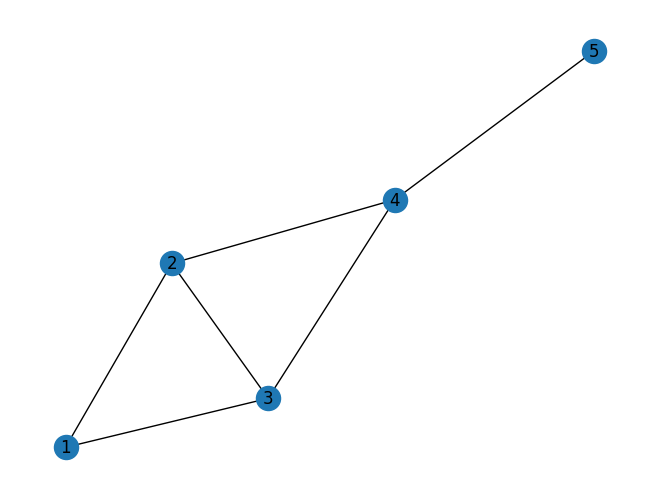

In [68]:
import matplotlib.pyplot as plt
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5])

# Add edges
edgelist = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)]
G.add_edges_from(edgelist)

# Generate layout for the graph
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos=pos, with_labels=True)

# Display the graph
plt.show()


- deg($v_1$) = 2
- deg($v_2$) = 3
- deg($v_3$) = 3
- deg($v_4$) = 3
- deg($v_5$) = 1

Sum of degrees = $2 + 3 + 3 + 3 + 1 = 12$\
Number of edges = 6

Handshake theorem:\
$ 2 \cdot \text{the number of edges of } G = 2 \cdot 6 = \textbf{12}$\
  
The sum of degrees, which is also $12$, correspond with the theorem. Hence this graph exists.

---

<b> Travelling in a Graph

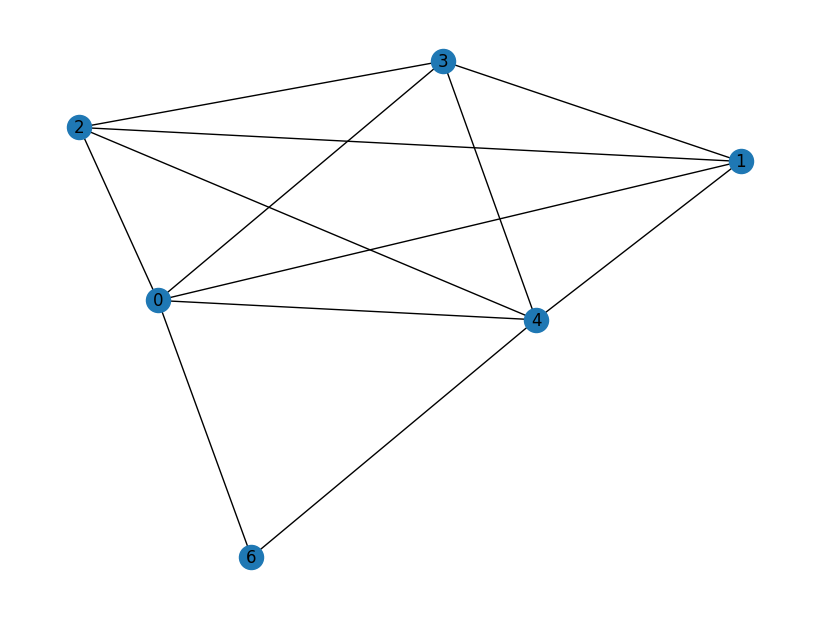

In [85]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Create two complete graphs
g1 = nx.complete_graph(5)
g2 = nx.complete_graph(4)

# Create an extra graph
exgra = nx.from_edgelist([(4, 6), (6, 0)])

# Compose all graphs
G = nx.compose_all([g1, g2, exgra])

# Draw the graph using spring layout
nx.draw(G, with_labels=True, labels={node: str(node) for node in G.nodes()})

plt.show()


- A walk is a sequence of vertices and edges that travels from one vertex to another, following the edges. It's also not constrained (e.g., by repeating vertices or edges).
    - One possible walk from $v_6$ to $v_4$ is $v_6v_0v_4v_1v_4$
- A trail is similar to a walk, but without repeated edges
    - One possible trail from $v_6$ to $v_2$ is $v_6v_0v_4v_3v_0v_2$
- A path is similar to a walk, but without repeated vertices.
    - One possible path $v_0$ to $v_6$ is $v_0v_1v_2v_3v_4v_6$
- A closed walk is a walk that starts and ends at the same vertex, being able to also traverse the same edge or vertex multiple times.
    - One possible closed walk starting and ending at $v_0$ is  $v_0v_4v_3v_4v_0$
- A circuit is a closed walk that contains at least one edge and does not contain a repeated edge. It starts and ends at the same vertex and doesn't repeat any edge.
    - One possible circuit starting and ending at $v_0$ is $v_0v_1v_3v_4v_2v_3v_0$
- A simple circuit is a circuit without any repeated vertices except the first and the last.
    - One possible simple circuit starting and ending at $v_0$ is $v_0v_1v_2v_3v_4v_6v_0$

---

<b>Connected Graphs

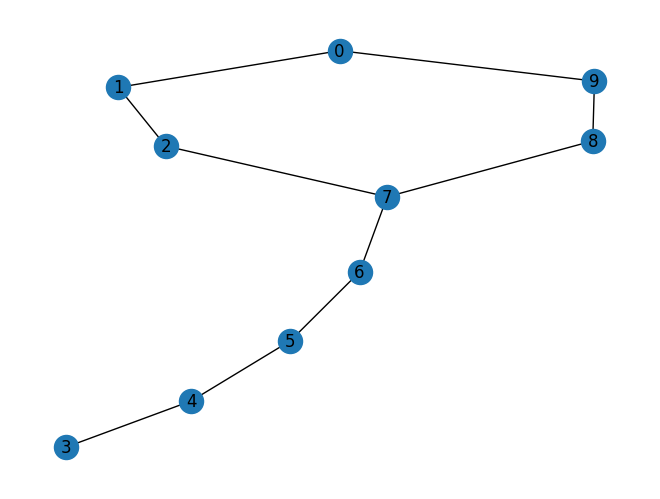

In [92]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a connected graph
G = nx.connected_watts_strogatz_graph(n=10, k=3, p=0.1)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()


This graph is connected because:
- Any two vertices has at least a walk between them.
- Any two distinct vertices can be connected by a path.

---

<b>Euler's Circuit

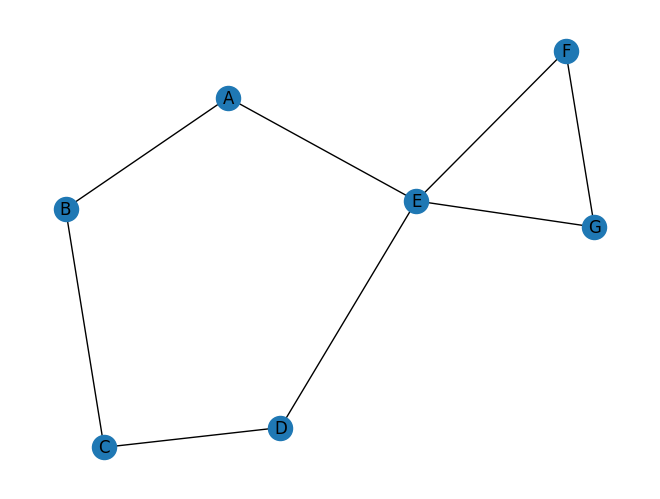

In [132]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges to the graph
edges = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'E'), ('A','E')]
G.add_edges_from(edges)

# Draw the graph
nx.draw(G, with_labels=True)

# Show the plot
plt.show()


Because every vertex in the graph has an positive even degree, we can confirm that this graph contains a Euler's circuit. The Euler's circuit for this graph is $A \rightarrow B \rightarrow C \rightarrow D \rightarrow E \rightarrow F \rightarrow G \rightarrow E \rightarrow A$

---

<b>Euler's trail

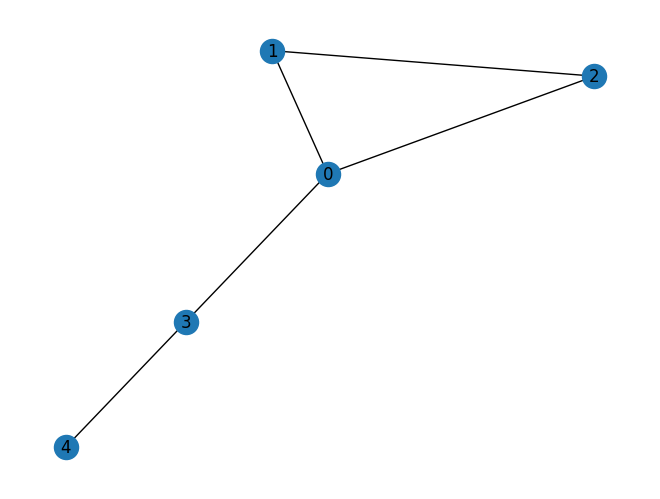

In [133]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges to the graph
edges = [(4,3), (3,0), (0,1), (1,2), (2,0)]
G.add_edges_from(edges)

# Draw the graph
nx.draw(G, with_labels=True)

# Show the plot
plt.show()


An Euler path from vertex $v$ to vertex $w$ in graph $G$ exists if $G$ is connected, $v$ and $w$ have odd degree, and all other vertices in $G$ have a positive even degree.
- Say $v$ is $v_4$ and $w$ is $v_0$, then it already satisfies the definition of the vertices of the Euler's trail, such that both vertices are connected, both have odd degree, while the rest of the vertices have positive even degree
- The euler's trail is: $v_4v_3v_0v_2v_1v_0$
  

---

<b> Hamiltonian Circuit

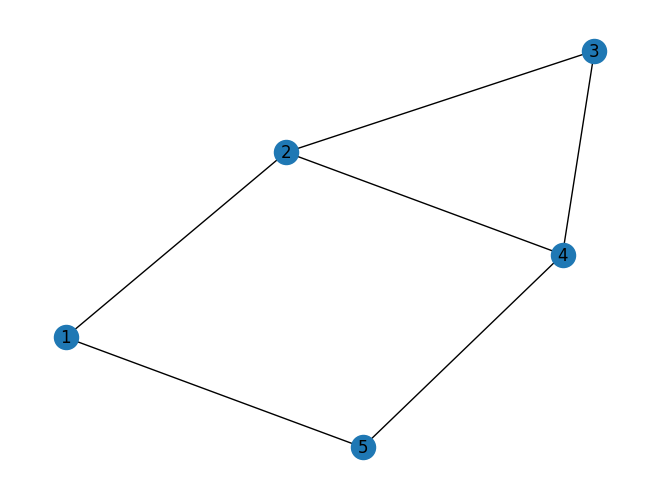

In [140]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges to the graph
edges = [(1,2), (2,3),(3,4),(4,5), (5,1), (2,4)] 
G.add_edges_from(edges)

# Draw the graph
nx.draw(G, with_labels=True)

# Show the plot
plt.show()


A Hamiltonian circuit in $G$ is a sequence of adjacent vertices where every vertex appears exactly once, except the first and last which are the same. If a graph $G$ has a Hamiltonian circuit, then it contains a subgraph $H$ that is connected, includes all vertices of $G$, has the same number of edges as vertices, and where every vertex has a degree of 2. In the case of the graph:
- There exists a subgraph that contains every vertex. (In our subgraph, we can exclude the edge $v_2v_4$) 
- In this subgraph, all the vertices still have a walk to each other, hence it's connected
- The subgraph has the same number of vertices as edges (as we excluded the two edges to make the subgraph)
- Each vertex has a degree 2

With this subgraph, we can make a Hamiltonian circuit, which is:
$v_1v_2v_3v_4v_5v_1$


---

<b>The Travelling Salesman Problem

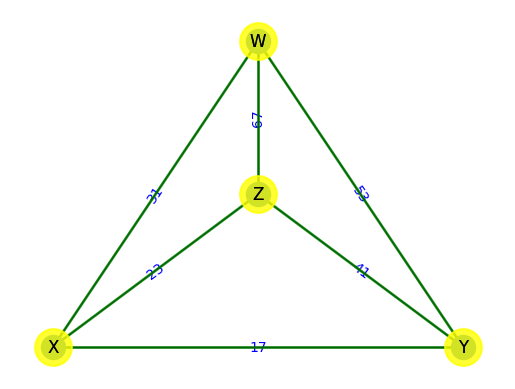

In [150]:
import matplotlib.pyplot as plt
import networkx as nx

# Set a seed for reproducibility
seed = 42
# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(["X", "Y", "Z", "W"])

# Add edges between nodes
edgelist = [("X", "Y"), ("X", "Z"), ("X", "W"), ("Y", "Z"), ("Y", "W"), ("Z", "W"), ("X", "W"), ("Y", "Z")]
G.add_edges_from(edgelist)

# Define positions using a planar layout
pos = nx.planar_layout(G)

# Define edge labels
edge_labels = {
    ('X', 'Y'): '17', 
    ('X', 'Z'): '23', 
    ('X', 'W'): '31',
    ('Y', 'Z'): '41',
    ('Y', 'W'): '53',
    ('Z', 'W'): '67',
}

# Draw the edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue')

# Draw the graph
nx.draw(G, pos=pos, with_labels=True)
nx.draw(G, pos, edge_color='green', width=2, linewidths=1.5, node_size=700, node_color='yellow', alpha=0.8, with_labels=True)

# Show the plot
plt.show()


We look for subgraphs that have a Hamiltonian circuit in which we compute all of the circuits total distance and see which circuit uses the least distance for traveling. We start and end with X.

- $X \rightarrow Y \rightarrow Z \rightarrow W \rightarrow X = 156$
- $X \rightarrow Y \rightarrow W \rightarrow Z \rightarrow X = 160$
- $X \rightarrow Z \rightarrow Y \rightarrow W \rightarrow X = 148$
- $X \rightarrow Y \rightarrow W \rightarrow Z \rightarrow X = 160$
- $X \rightarrow W \rightarrow Y \rightarrow Z \rightarrow X = 192$
- $X \rightarrow W \rightarrow Z \rightarrow Y \rightarrow X = 156$

From this routes, we can say that $X \rightarrow Y \rightarrow Z \rightarrow W \rightarrow X$ and $X \rightarrow W \rightarrow Z \rightarrow Y \rightarrow X$ are the best routes.